# Generate Station Map for GMAG documentation

Generate a map of station locations for the GMAG website. 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import folium

In [2]:
# read station data
data = pd.read_csv('..\\gmag\\Stations\\station_list.csv')
arrays = data.Array.unique()
arrays

array(['CARISMA', 'CANMOS', 'AUTUMNX', 'DTU', 'IMAGE', 'GIMA', 'MACCS',
       'McMAC', 'THEMIS', 'USGS', 'PENGUIN'], dtype=object)

In [27]:
# generate station/array map
stn_map = folium.Map(location=[40,200],zoom_start=1,
                    width=650, height=400)

col = ['red','lightred','orange','cadetblue',
      'blue','lightblue','purple','lightgreen','lightgray'
      'grey','darkblue']



for x, y in zip(arrays,col): 
    stn_dat = data[data['Array'] == x].copy()
    for label, row in stn_dat.iterrows():
        folium.Circle(
            radius=100,
            location=[row['Latitude'],row['Longitude']],
            color=y,
            fill=True,
            ).add_to(stn_map)
        #folium.Marker([row['Latitude'],row['Longitude']], popup='{0} {1}'.format(x,row['Code']),
        #             icon=folium.Icon(color=y)).add_to(stn_map)
    
    

In [28]:
# save station/array map
stn_map
#stn_map.save('stn_map.html')

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

array(['CARISMA', 'CANMOS', 'AUTUMNX', 'DTU', 'IMAGE', 'GIMA', 'MACCS',
       'McMAC', 'THEMIS', 'USGS', 'PENGUIN'], dtype=object)

CARISMA


CANMOS


AUTUMNX


DTU


IMAGE


GIMA


MACCS


McMAC


THEMIS


USGS


PENGUIN


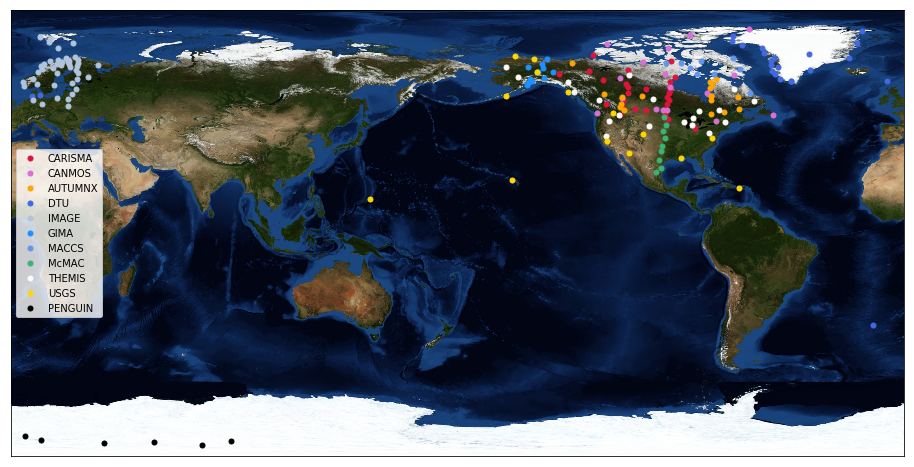

In [55]:
fig = plt.figure(figsize=(16, 10), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=0, urcrnrlon=360, )
m.bluemarble(scale=0.5);

col = ['crimson','orchid','orange',
      'royalblue','lightsteelblue','dodgerblue','cornflowerblue','mediumseagreen','snow',
      'gold','black']

for x, y in zip(arrays,col): 
    print(x)
    stn_dat = data[data['Array'] == x].copy()
    lon = stn_dat['Longitude'].copy()
    lat = stn_dat['Latitude'].copy()
    plt.plot(lon, lat, 'ok',color=y, markersize=5,label=x)
    #for label, row in stn_dat.iterrows():
            #lon,lat=m(row['Longitude'],row['Latitude'])
            #if lon >180:
            #    lon = lon-360
            #plt.plot(lon, lat, 'ok',color=y, markersize=5)

plt.draw()
plt.legend()
plt.savefig('C:\\Users\\krmurph1\\OneDrive\\GMAG_Frontiers\\Station_map.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>